# Logistic Regression
 determine each applicant's chance of admission based on their results on two exams

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
import os
path1 = os.getcwd() + '/machine-learning-ex2/ex2/ex2data1.txt'
data = pd.read_csv(path1, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


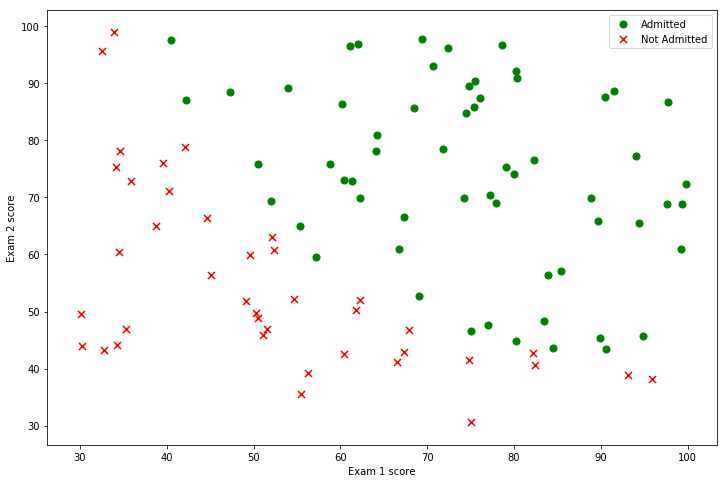

In [47]:
# Create a scatter plot of the two exam's scores
pos = data[data['Admitted'].isin([1])]
neg = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(pos['Exam 1'], pos['Exam 2'], s=50, c='g', marker='o', label='Admitted')
ax.scatter(neg['Exam 1'], neg['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.legend()

In [48]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

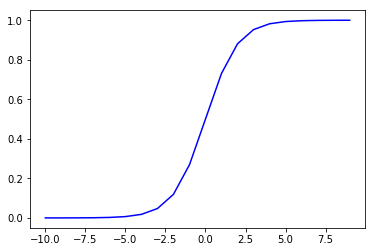

In [49]:
# check if function is working as expected
nums = np.arange(-10, 10)

fig , ax = plt.subplots()
ax.plot(nums, sigmoid(nums), 'b')

In [50]:
# Cost function without regularization
def cost(theta, X, y):
    ''' Arguments are numpy arrays and
    to calculationsinside is done using matrices.
    Return value is the cost calculated using cost
    function for logistic regression with lamda=0'''
    
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    term1 = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    term2 = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    
    return np.sum(term1 - term2) / len(X)

In [51]:
# add x0 to data
data.insert(0, 'x0', 1)

# separate X and y
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]

# convert pandas series to numpy arrays
X = np.array(X.values)
y = np.array(y.values)

# Initialize theta
theta = np.zeros(3)

In [52]:
X.shape, y.shape, theta.shape

((100, 3), (100, 1), (3,))

In [53]:
# initial cost of the model
cost(theta, X, y)

0.6931471805599453

In [54]:
# Function to calculate gradients w/o regularization
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    n = int(theta.ravel().shape[1])
    grad = np.zeros(n)
    
    grad = np.divide((X.T * (sigmoid(X * theta.T) - y)), len(X))
    
    return grad

In [55]:
gradient(theta, X, y).shape

(3, 1)

In [56]:
# use Scipy's truncated newton implementation to find optimum theta
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X,y))
result

(array([-25.16131848,   0.20623159,   0.20147148]), 36, 0)

In [57]:
# Minimized cost of the model
cost(result[0], X, y)

0.20349770158947522

In [58]:
# function for predictions
def predict(theta, X):
    theta = np.matrix(theta)
    X = np.matrix(X)
    
    h = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in h]

In [59]:
# Calculating accuracy of the model
predictions = predict(result[0], X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(correct) / len(correct)) * 100
print('accuracy: %0.0f' % accuracy)

accuracy: 89


##############################################
# Regularized Logistic Regression
##############################################

test results for some microchips on two different tests

In [60]:
path2 = os.getcwd() + '/machine-learning-ex2/ex2/ex2data2.txt'
data2 = pd.read_csv(path2, names=['Test 1', 'Test 2', 'Accepted'])
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


Text(0,0.5,'Microchip test 2')

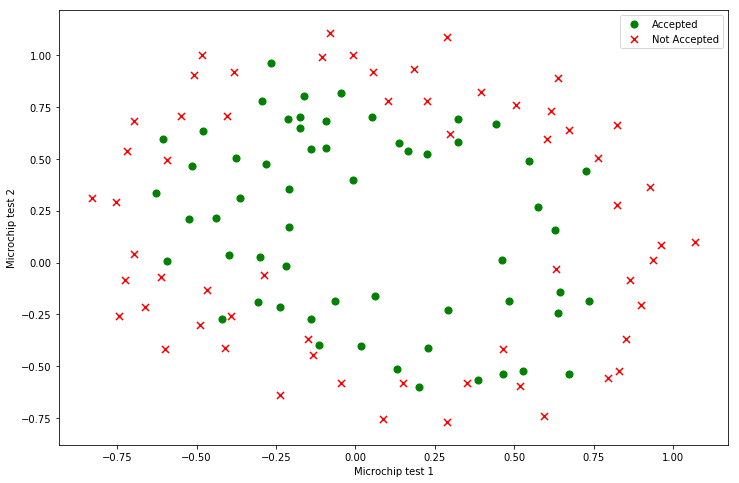

In [61]:
# plot the data
pos = data2[data2['Accepted'].isin([1])]
neg = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(pos['Test 1'], pos['Test 2'], s=50, c='g', marker='o', label='Accepted')
ax.scatter(neg['Test 1'], neg['Test 2'], s=50, c='r', marker='x', label='Not Accepted')
ax.legend()
ax.set_xlabel('Microchip test 1')
ax.set_ylabel('Microchip test 2')

In [62]:
# create polynomial features to capture the complexity of the data
x1 = np.array(data2['Test 1']).reshape(len(data2['Test 1']), 1)
x2 = np.array(data2['Test 2']).reshape(len(data2['Test 2']), 1)
y2 = np.array(data2['Accepted']).reshape(x2.shape[0], 1)

degree = 6

# array to hold x0, x1, x2, x1^2, x2^2, x1*x2, ...
X2 = np.ones((x1.shape[0],1))

for i in range(1, degree):
    for j in range(0, i):
        feature = np.power(x1, i-j) * np.power(x2, j)
        X2 = np.concatenate([X2, feature], axis=1)

X2.shape, y2.shape

((118, 16), (118, 1))

In [63]:
# cost function with regularization
def costReg(theta, X, y, lam):
    theta = np.matrix(theta)
    cst = cost(theta, X, y)
    theta[0,0] = 0
    
    reg = (lam / (2 * len(X))) * np.sum(np.power(theta, 2))
    
    #reg = (lam / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    
    return cst + reg

In [64]:
# gradient function with regularization
def gradientReg(theta, X, y, lam):
    theta = np.matrix(theta)
    grd = gradient(theta, X, y)
    theta[0,0] = 0
    
    return grd + ((lam / len(X)) * theta.T)

In [65]:
# Initialize theta and lambda
theta2 = np.zeros(X2.shape[1])
lam = 1

In [66]:
# optimize using scipy truncated optimization newton implementaion
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, lam))
result2

(array([ 0.53462809,  0.33168863, -1.57909704, -0.54894074,  0.0783016 ,
        -0.16779934, -0.38870204, -1.33691288,  0.04007848, -0.92990076,
         0.05653583, -0.29866467, -0.09104342, -0.08585188, -0.43851632,
        -0.20350352]), 22, 1)

In [67]:
# calculate the accuracy of the model
predictions2 = predict(result2[0], X2)
correct2 = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a,b) in zip(predictions2, y2)]
accuracy2 = (sum(correct2) / len(correct2)) * 100
print('accuracy: %0.0f' % accuracy2)

accuracy: 67


##############################
# using sklearn
##############################

In [68]:
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X2, y2.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
model.score(X2, y2)

0.6694915254237288